## ASSIGNMENT 6: MUSHROOM CLASSIFICATION 
##### DTSC-680 APPLIED MACHINE LEARNING
##### October 11, 2025
##### Breanna Williams

---
### Project Summary
We used the Mushroom dataset, found on the UCI Machine Learning Repository, to build a Sequential neural network to classify mushrooms as edible or poisonous. During data exploration, we determined that all but one of the feature variables were highly variable and significantly associated with the target. We were able to train a model that achieved 100% accuracy on both the training and validation datasets. Using Principal Component Analysis(PCA) to reduce the number of features, we created a seperate model that achieved 99% accuracy on both the training and validation datasets with a slightly faster training time than the original model. We concluded that either model would be suitable for deployment, but the PCA model may be preferred due to its reduced complexity and faster training time. However, the differences in accuracy and training time between the two models were minimal and may not be significant enough in real-world applications to justify the use of PCA.

#### Mushroom Database
The Mushroom dataset can be found at: https://archive.ics.uci.edu/dataset/73/mushroom, where the database has been subsetted to include "descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one."

The dataset was taken from the Audubon Society Field Guide to North American Mushrooms (1981) by Gary H. Lincoff, an American mycologist and naturalist. The Audubon Society Field Guide to North American Mushrooms is a comprehensive guide to identifying mushrooms in North America, published by The Audobon Society in 1981. The guide includes detailed descriptions and illustrations of over 700 species of mushrooms, along with information on their habitat, edibility, and toxicity.The database was donated to the UCI Machine Learning Repository by
Jeff Schlimmer on April 27, 1987.

Source: "Mushroom." UCI Machine Learning Repository, 1981, https://doi.org/10.24432/C5959T.

#### Attribute Information
1. classes: 
     edible=e , poisonous=p

2. cap-shape: 
     bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

3. cap-surface:            
     fibrous=f, grooves=g, scaly=y, smooth=s

4. cap-color:                
     brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

5. bruises?:                 
     bruises=t, no=f

6. odor:                     
     almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

7. gill-attachment:          
     attached=a, descending=d, free=f, notched=n

8. gill-spacing:             
     close=c, crowded=w, distant=d

9. gill-size:                
     broad=b, narrow=n

10. gill-color:               
     black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

11. stalk-shape:              
    enlarging=e, tapering=t

12. stalk-root:               
    bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

13. stalk-surface-above-ring: 
    fibrous=f, scaly=y, silky=k, smooth=s

14. stalk-surface-below-ring: 
    fibrous=f, scaly=y, silky=k, smooth=s

15. stalk-color-above-ring:   
    brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

16. veil-type: 
    partial=p, universal=u

17. veil-color:               
    brown=n, orange=o, white=w, yellow=y

18. ring-number:              
    none=n, one=o, two=t

19. ring-type:                
    cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

20. spore-print-color:        
    black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

21. population:               
    abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

22. habitat:                  
    grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

---
### Necessary Imports and Data Loading

In [1]:
# Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Listing column names for the dataset
cols = ['classes', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

# Loading the dataset
mushroom_data = pd.read_csv('agaricus-lepiota.csv', names = cols)

---
### Quick Overview of the Dataset
All data types from the mushroom dataset are nominal categorical/object data types. There are 8,124 rows and 22 columns with no missing values.

In [3]:
# Quick view of the dataset
mushroom_data.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Checking the structure of the dataset, missing values, and data types.
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

---
### Split the Data
With a general sense of the data, next we split the dataset. We train our model on 80% of the dataset and reserve the remaining 20% for testing the accuracy and generalizability of our model. 

    Note: We split the data before performing exploratory data analysis (EDA), so that we don't introduce bias or data leakage into our model during training.

In [5]:
from sklearn.model_selection import train_test_split

# Isolating the target from the features
x = mushroom_data.drop(['classes'], axis = 1) # Features
y = mushroom_data['classes'] # Target

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

# Checking the sizes
for i in x_train, x_test, y_train, y_test:
    print(round(len(i) / len(mushroom_data), 2))

0.8
0.2
0.8
0.2


---
### Data Exploration

#### Target Variable 
To familiarize ourselves with the training data. We began by examining our target variable, "class", which indicates whether a mushroom is edible (e) or poisonous (p).

The target variable is relatively balanced, with approximately 52% of the mushrooms being edible and 48% being poisonous. A balanced target variable is what we're going for as it helps to ensure that the class proportions reflect the full data set and that our model doesn't become biased towards one class.

In [6]:
# Examining the distribution of the target variable in the training set
y_train_counts = round(y_train.value_counts(normalize = True), 2)
y_train_counts

classes
e    0.52
p    0.48
Name: proportion, dtype: float64

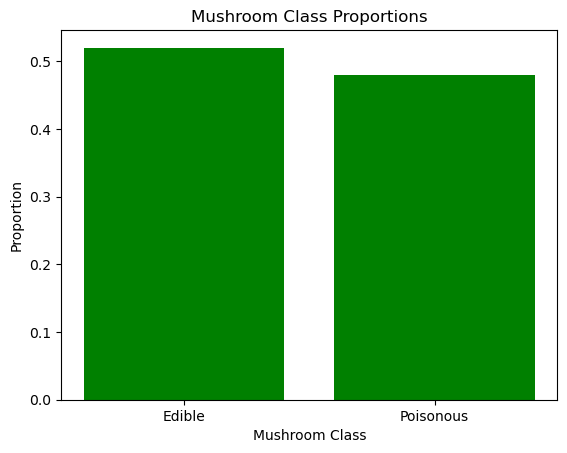

In [7]:
# Let's plot
plt.bar(y_train_counts.index, y_train_counts.values, color = 'green')
plt.title('Mushroom Class Proportions')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.xlabel('Mushroom Class')
plt.ylabel('Proportion')
plt.show()

#### Feature Variables
Next, we explored the feature variables to assess their relationships to the target variable. Our Sequential model doesn't require feature selection, but understanding the relationships between features and the target can help us interpret the model's predictions.

When visualizing the features against the target variable it became very apparent that many, if not most, of the features have very moderate to high variance between their individual categories and between mushrooms categorized as edible and poisonous. A model would be able to distinguish rather easily between edible and poisonous mushrooms using these features.

C:\Users\BreCa\AppData\Local\Temp\ipykernel_47448\4117175438.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


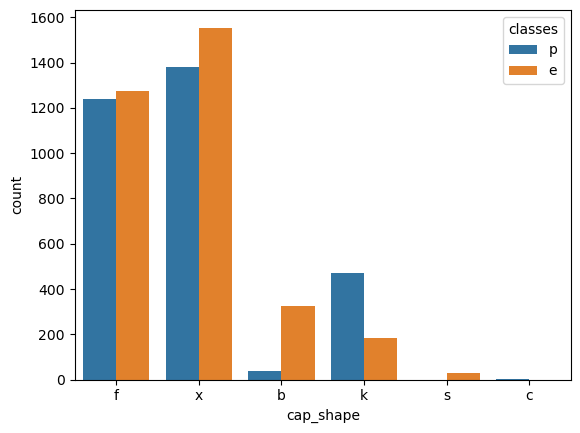

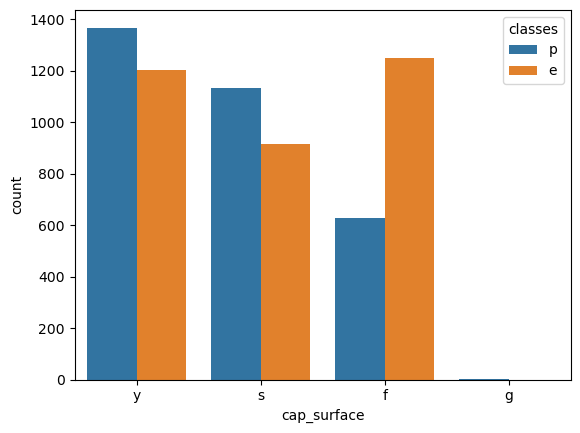

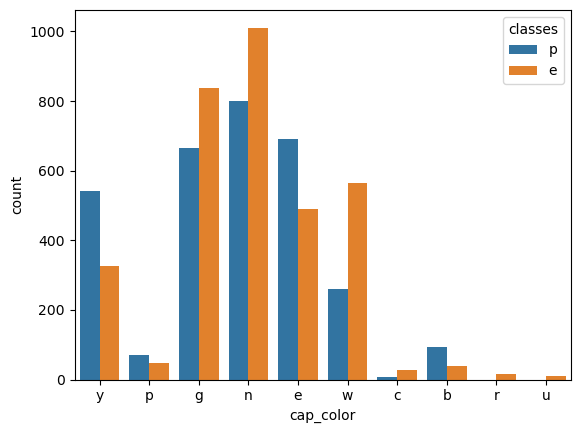

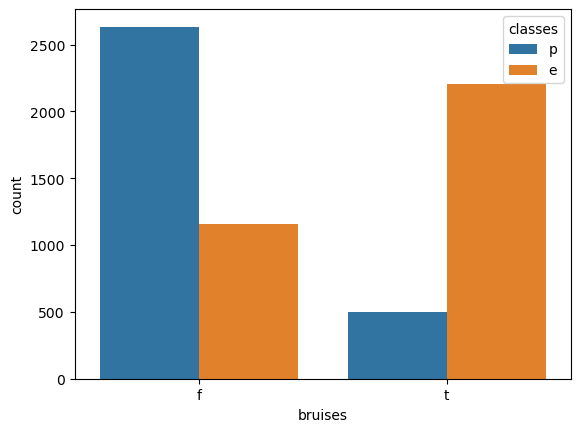

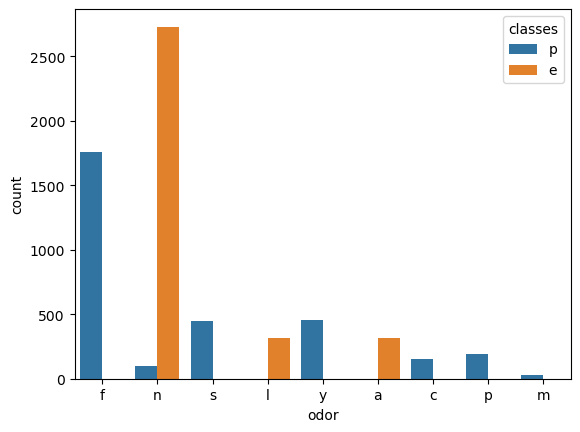

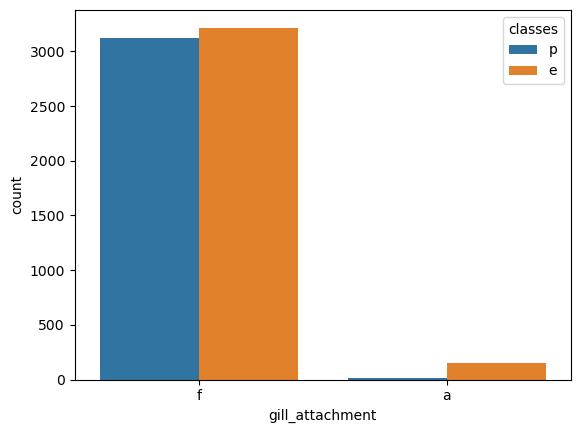

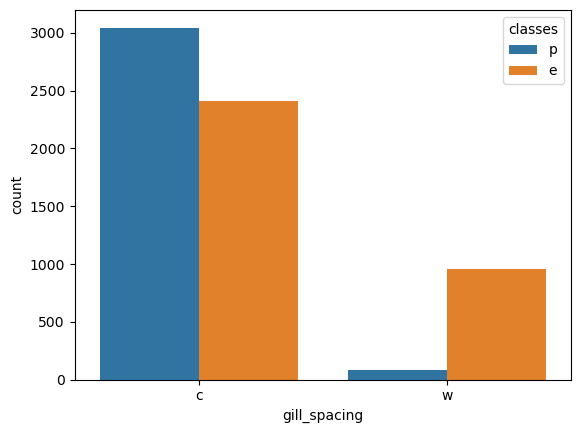

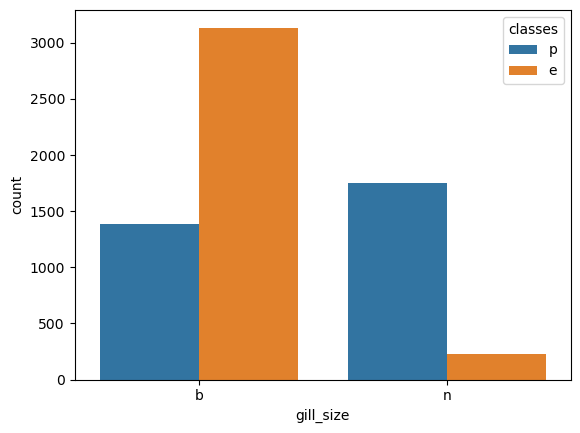

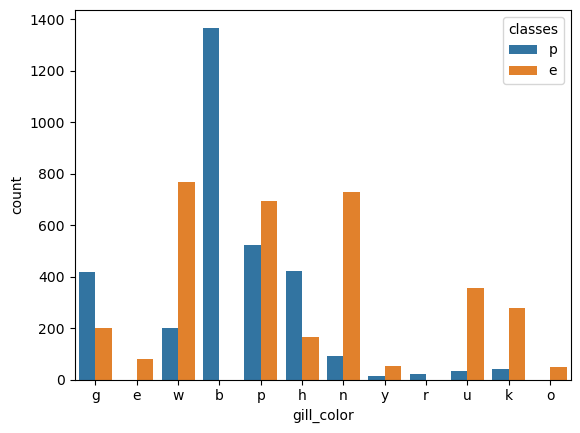

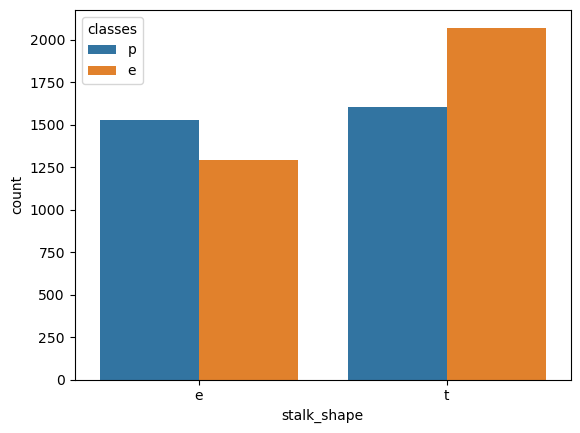

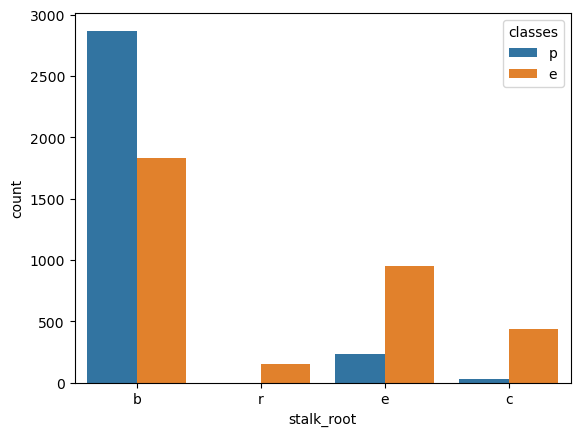

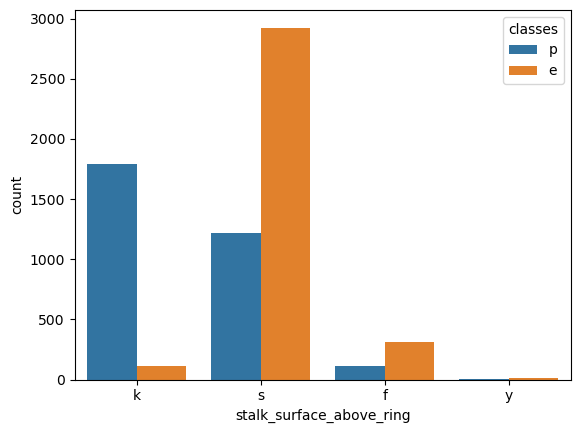

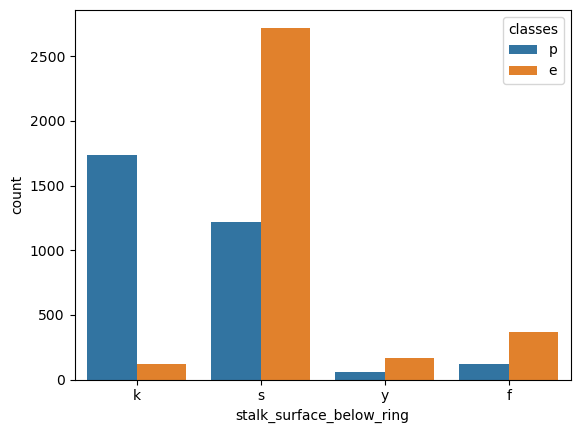

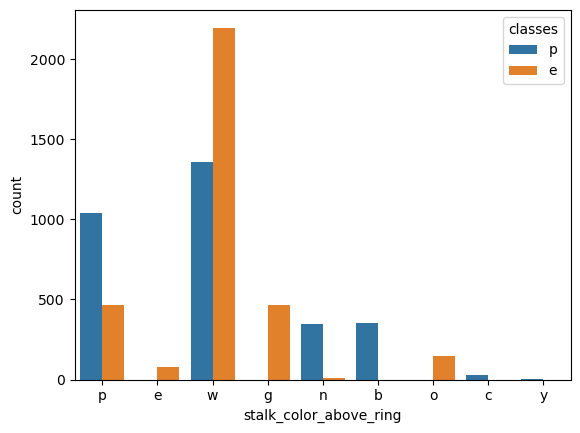

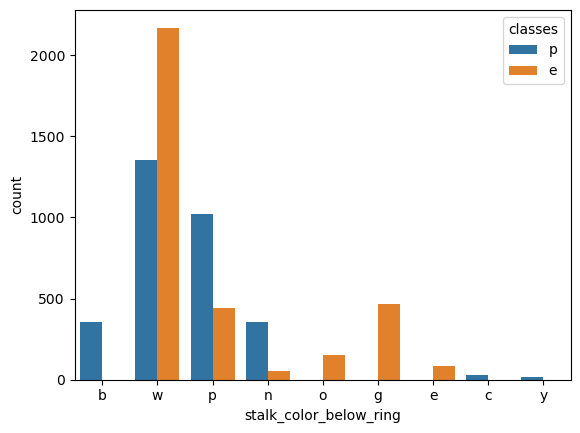

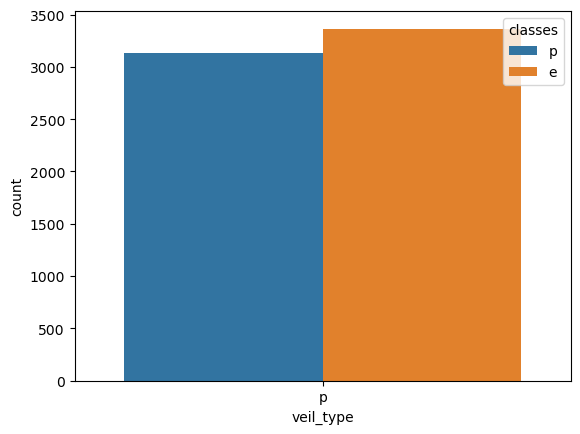

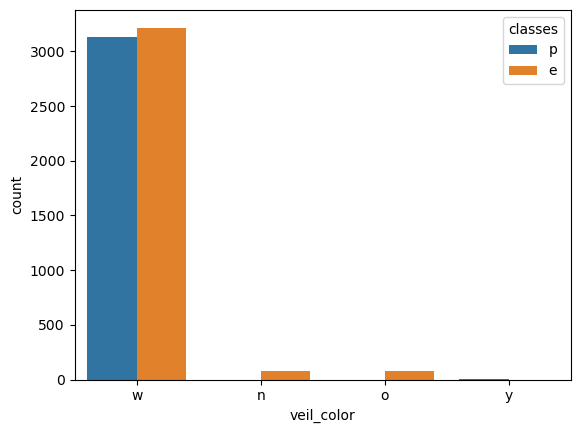

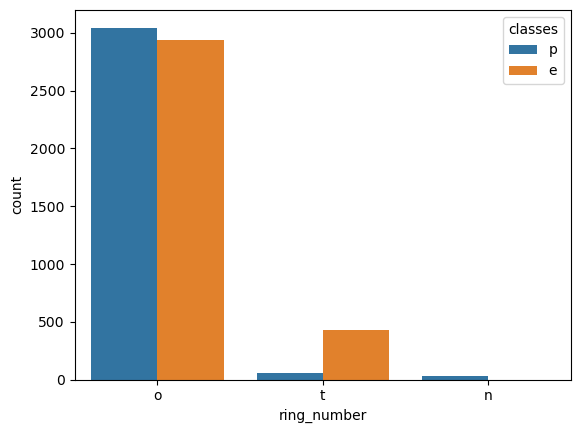

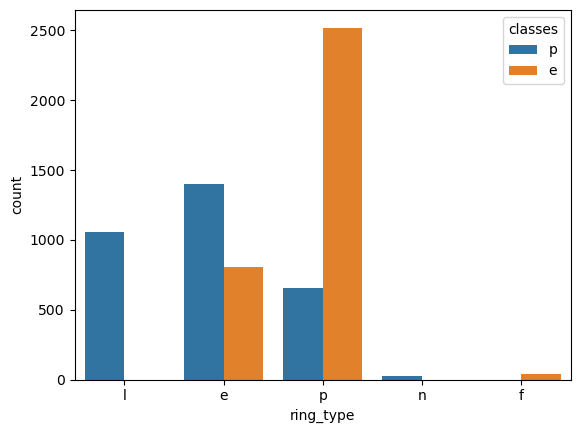

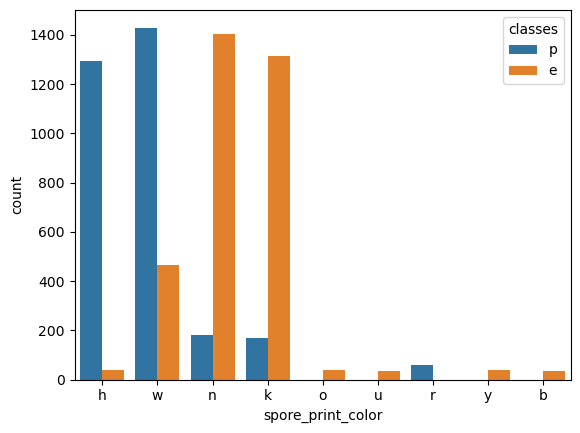

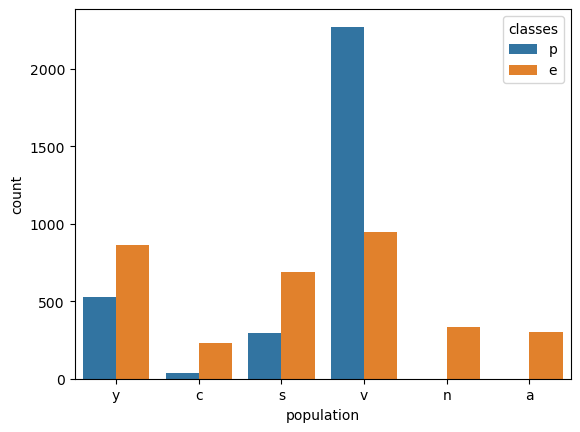

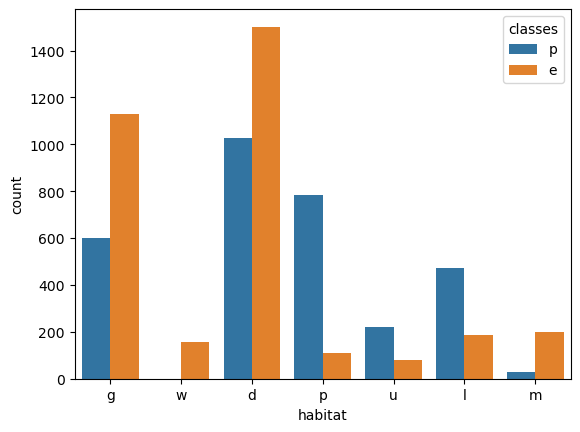

In [8]:
# Let's visualize the distributions of the feature variables with respect to the target variable using count plots
for i, col in enumerate(x_train):
    plt.figure(i)
    sns.countplot(data = x_train, x = col, hue = y_train)

#### Feature Importance via Chi-Squared Test of Independence
We used the chi-squared test of independence to root out the features that are most significantly associated with the target variable.

Our null and alternative hypotheses are as follows:
H0: There is no association between the feature variable and the target variable(class).
H1: There is an association between the feature variable and the target variable(class).

The results of the chi-squared tests of independence showed that all features, save for veil-type, are statistically significant with p-values less than an alpha level of 0.05. The chi-squared test statistics also indicate that most of the features are highly associated with the target variable. The strongest 3 features, as indicated by the chi-squared test are:
    1. odor
    2. spore-print-color
    3. gill-color

As a result, we reject the null hypothesis for all features except veil-type, concluding that there is a significant association between these features and the target variable(class).

In [9]:
from scipy.stats import chi2_contingency

# Creating empty lists to store results for the dataframe
feature_names = []
chi2_values_list = []
p_values_list = []

# Creating a loop to calculate p-values and chi2 stats for each feature
for col in x_train.columns:
    if col != 'classes': # Excluding the target variable
        ct = pd.crosstab(x_train[col], y_train)
        chi2_stat, p_value, dof, expected = chi2_contingency(ct)
        # Storing the results in the lists
        chi2_values_list.append(chi2_stat)
        p_values_list.append(p_value)
        feature_names.append(col)

# Creating a dataframe to better display the results
chi2_results = pd.DataFrame({
    'Column': feature_names,
    'chi2': chi2_values_list,
    'p-value': p_values_list
})

# Sorting the features by p-value and then Chi2 statistic
chi2_results = chi2_results.sort_values(by = ['p-value', 'chi2'], ascending = [True, False]).reset_index(drop = True)

# Displaying the results with formatted p-values instead of scientific notation
chi2_results = chi2_results.style.format({'chi2': '{:.2f}', 'p-value': '{:.6f}'}) 

chi2_results

,Column,chi2,p-value
0,odor,6123.84,0.000000
1,spore_print_color,3712.40,0.000000
2,gill_color,3007.24,0.000000
3,ring_type,2371.04,0.000000
4,stalk_surface_above_ring,2275.95,0.000000
5,stalk_surface_below_ring,2158.28,0.000000
6,gill_size,1840.46,0.000000
7,stalk_color_above_ring,1804.08,0.000000
8,stalk_color_below_ring,1744.49,0.000000
9,bruises,1639.80,0.000000


---
### Prepare the Data for Modeling

We preprocessed our target column, y_train, by using label encoding to convert 'e' and 'p', to 0 and 1.

Next, we performed a similar task on our feature columns, x_train, using one-hot-encoding to convert the multiclass feature columns into numeric binary-encoded columns. 

Additionally, although our training data does not contain any null or missing values, to be on the safe side, we applied the SimpleImputer method to fill any missing values that may be present in new data with the most frequent value.

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Preprocessing the target variable
le = LabelEncoder()
y_train_preprocessed = le.fit_transform(y_train)

# Creating a pipeline to impute missing values and one-hot encode the features
feature_pipeline = make_pipeline(
    SimpleImputer(strategy = 'most_frequent'),
    OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)) 

# Preprocessing the feature variables          
feature_transformer = ColumnTransformer([
    ('features', feature_pipeline, x_train.columns)], remainder = 'drop')
x_train_preprocessed = feature_transformer.fit_transform(x_train)

---
### Train the Model
We trained a Sequential model using TensorFlow/Keras. A Sequential model is a type of neural network model consisting of layers that apply transformations to the preprocessed input features in a sequential manner. Each layer takes the output of the previous layer as its input and applies a set of weights and biases to produce its own output.

#### Model Architecture
In our case, we used a Sequential model with just two layers: an input layer and an output layer. The output layer used a sigmoid activation function, which is commonly used for binary classification tasks. The sigmoid function maps the output to a value between 0 and 1, which can be interpreted as the probability of the positive class (in this case, poisonous mushrooms).

Once we created the "architecture" of the model by adding the layers, we compiled the model. Compiling the model involves specifying the optimizer, loss function, and evaluation metrics.

Finally, we fit the model to the preprocessed training data using both the training and test data, and setting a batch size of 100 and training for 10 epochs. The batch size determines the number of samples that will be propagated through the network at once, while the number of epochs determines how many times the entire training dataset will be passed through the network. With every pass, it is evaluated using the loss function and metrics specified during compilation, and the weights and biases are updated using backpropagation to minimize the loss.

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Building the Sequential model's architecture
model = Sequential() 
model.add(Dense(128, activation = 'relu', input_dim = x_train_preprocessed.shape[1])) # Input layer
model.add(Dense(1, activation = 'sigmoid')) # Output layer
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
# Preprocessing the test set in the same way as the training set before fitting the model in the next step
y_test_preprocessed = le.transform(y_test)
x_test_preprocessed = feature_transformer.transform(x_test)

In [13]:
%%time

# Train the model
hist = model.fit(x_train_preprocessed, y_train_preprocessed, validation_data = (x_test_preprocessed, y_test_preprocessed), epochs = 10, batch_size = 100)

Epoch 1/10
65/65 [==============================] - 2s 10ms/step - loss: 0.2767 - accuracy: 0.9009 - val_loss: 0.0842 - val_accuracy: 0.9815
Epoch 2/10
65/65 [==============================] - 0s 5ms/step - loss: 0.0467 - accuracy: 0.9934 - val_loss: 0.0281 - val_accuracy: 0.9963
Epoch 3/10
65/65 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.9986 - val_loss: 0.0139 - val_accuracy: 0.9982
Epoch 4/10
65/65 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9995 - val_loss: 0.0083 - val_accuracy: 0.9982
Epoch 5/10
65/65 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 0.9994
Epoch 6/10
65/65 [==============================] - 0s 5ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 7/10
65/65 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 8/10
65/65 [=

#### Visualizing the Training Outcomes

The "Training and Validation Accuracy" plot reveals that, by the second epoch, the model did a near perfect job of accurately classifying the mushrooms in both the training and validation sets and by the end of the training process, the model achieved an impressive accuracy of 100% on both sets.

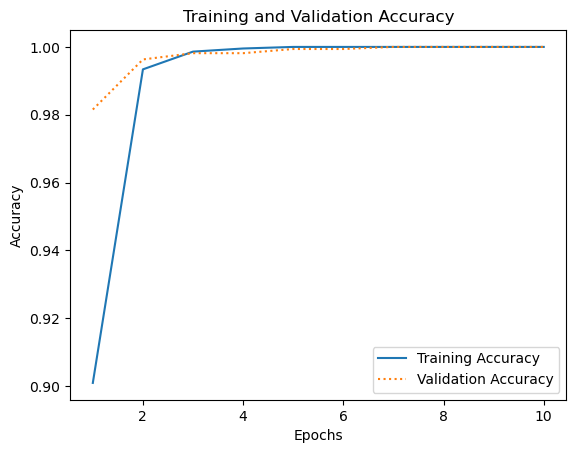

In [14]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label = 'Training Accuracy')
plt.plot(epochs, val, ':', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
print(f'Training Accuracy: {acc}')
print(f'Validation Accuracy: {val}')

Training Accuracy: [0.9009078145027161, 0.9933835864067078, 0.9986151456832886, 0.9995383620262146, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracy: [0.9815384745597839, 0.9963076710700989, 0.9981538653373718, 0.9981538653373718, 0.9993846416473389, 0.9993846416473389, 1.0, 1.0, 1.0, 1.0]


51/51 [==============================] - 0s 2ms/step


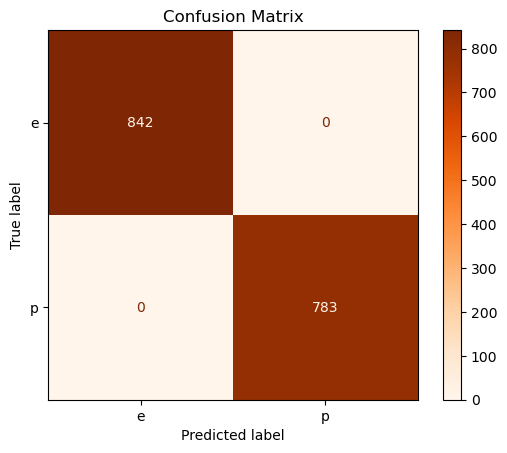

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay as cmd

# Making predictions with the model
predictions = model.predict(x_test_preprocessed) > 0.5

# Create a confusion matrix
cm = confusion_matrix(y_test_preprocessed, predictions)
disp = cmd(confusion_matrix = cm, display_labels = le.classes_)
disp.plot(cmap = plt.cm.Oranges)
plt.title('Confusion Matrix')
plt.show()

In [17]:
print(f' The model accurately predicted all {cm[0, 0]} of the mushrooms that were edible and {cm[1, 1]} mushrooms that were poisonous.')

 The model accurately predicted all 842 of the mushrooms that were edible and 783 mushrooms that were poisonous.


---
### Let's Repeat the Above Steps Using Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a large set of variables into a smaller set of uncorrelated variables called principal components, while retaining most of the original data's variance. We were already able to achieve exceptionally high accuracy with our original model, but we will see if we can maintain similar accuracy while reducing our rather large number of features (116 after one-hot encoding) using PCA. We will set n_components = 0.95 to retain 95% of the variance in the data.

In [18]:
from sklearn.decomposition import PCA

# Creating the PCA object
pca = PCA(n_components = 0.95, random_state = 42)

# Fitting PCA on the preprocessed training and test data
pca_x_train = pca.fit_transform(x_train_preprocessed)
pca_x_test = pca.transform(x_test_preprocessed)

In [19]:
# Building the Sequential model's architecture using PCA-transformed data
pca_model = Sequential() 
pca_model.add(Dense(128, activation = 'relu', input_dim = pca_x_train.shape[1]))
pca_model.add(Dense(1, activation = 'sigmoid'))
pca_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
%%time

# Train the PCA model
pca_hist = pca_model.fit(pca_x_train, y_train_preprocessed, validation_data = (pca_x_test, y_test_preprocessed), epochs = 10, batch_size = 100)

Epoch 1/10
65/65 [==============================] - 1s 9ms/step - loss: 0.4205 - accuracy: 0.9004 - val_loss: 0.2179 - val_accuracy: 0.9778
Epoch 2/10
65/65 [==============================] - 0s 5ms/step - loss: 0.1357 - accuracy: 0.9820 - val_loss: 0.0889 - val_accuracy: 0.9871
Epoch 3/10
65/65 [==============================] - 0s 5ms/step - loss: 0.0631 - accuracy: 0.9895 - val_loss: 0.0504 - val_accuracy: 0.9908
Epoch 4/10
65/65 [==============================] - 0s 5ms/step - loss: 0.0372 - accuracy: 0.9948 - val_loss: 0.0334 - val_accuracy: 0.9957
Epoch 5/10
65/65 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 0.9980 - val_loss: 0.0231 - val_accuracy: 0.9963
Epoch 6/10
65/65 [==============================] - 0s 5ms/step - loss: 0.0175 - accuracy: 0.9985 - val_loss: 0.0171 - val_accuracy: 0.9969
Epoch 7/10
65/65 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.9991 - val_loss: 0.0129 - val_accuracy: 0.9975
Epoch 8/10
65/65 [==

#### PCA Outcomes
Using PCA reduced our number of features from 116 to 40. While accuracy slightly decreased, the PCA model still achieved exceptionally high accuracy, with both the PCA training and validation accuracy achieving 99% accuracy by the end of training. This indicates that even with a reduced number of features, the model was still able to effectively classify mushrooms as edible or poisonous. The slight dip in accuracy was expected, with the loss of information that comes with reducing the number of features. The faster training time(pca - 3.31 secs vs original - 4.31) may justify use of this model over the original model. But, it's not a significant enough difference to make a strong case for it.

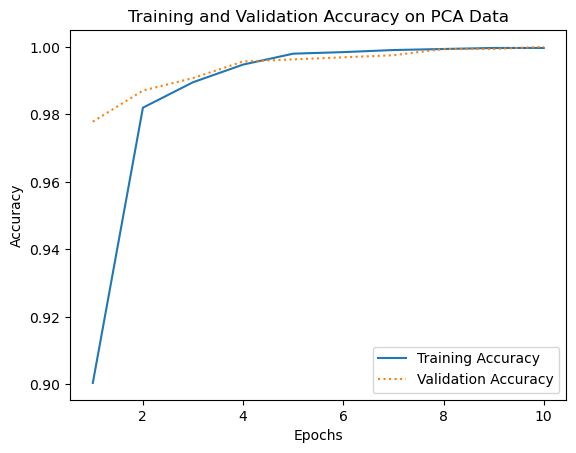

In [21]:
pca_acc = pca_hist.history['accuracy']
pca_val = pca_hist.history['val_accuracy']
pca_epochs = range(1, len(pca_acc) + 1) # Starts at one and continues the length of acc + 1

plt.plot(pca_epochs, pca_acc, '-', label = 'Training Accuracy')
plt.plot(pca_epochs, pca_val, ':', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy on PCA Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
print(f'PCA Training Accuracy: {pca_acc}')
print(f'PCA Validation Accuracy: {pca_val}')

PCA Training Accuracy: [0.9004462361335754, 0.9819972515106201, 0.9895368814468384, 0.9947684407234192, 0.9979996681213379, 0.9984613060951233, 0.999076783657074, 0.9993845224380493, 0.9996922612190247, 0.9996922612190247]
PCA Validation Accuracy: [0.9778461456298828, 0.9870769381523132, 0.9907692074775696, 0.9956923127174377, 0.9963076710700989, 0.9969230890274048, 0.9975384473800659, 0.9993846416473389, 0.9993846416473389, 1.0]


51/51 [==============================] - 0s 2ms/step


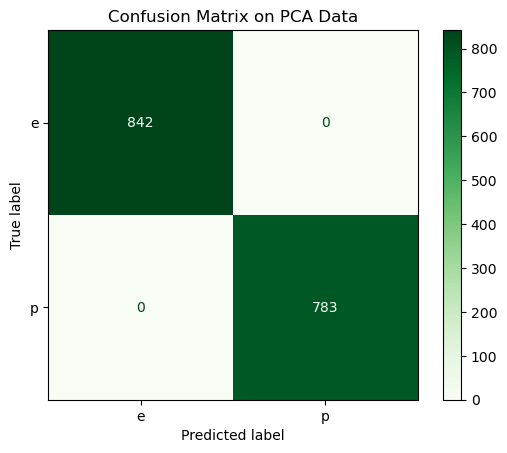

In [23]:
# Making predictions with the PCA model
pca_predictions = pca_model.predict(pca_x_test) > 0.5

# Create a confusion matrix
pca_cm = confusion_matrix(y_test_preprocessed, pca_predictions)
pca_disp = cmd(confusion_matrix = pca_cm, display_labels = le.classes_)
pca_disp.plot(cmap = plt.cm.Greens)
plt.title('Confusion Matrix on PCA Data')
plt.show()

In [24]:
print(f' The model accurately predicted all {pca_cm[0, 0]} mushrooms that were edible and {pca_cm[1, 1]} of {pca_cm[1, 1] + pca_cm[1, 0]} mushrooms that were poisonous.')

 The model accurately predicted all 842 mushrooms that were edible and 783 of 783 mushrooms that were poisonous.


---
### Export the PCA Model

In [25]:
pca_model.save('mushroom_pca_model.h5')

---
### Concept Questions

1. How many features does the data have after the One-Hot Encoding? How does this compare to the number of features that the data had before the encoding?

    Prior to one-hot encoding, the dataset contained **23** variables, including the target variable. One-hot encoding the feature variables increased the total number of variables to **116**.


2. What should the units parameter of the output layer in the network be and why? How many connections does your neural network contain?

    The units parameter of the model's output layer is set to 1 because we are performing a binary classification task. We expect the model to output a single probability between 0 or 1. The neural neural network uses 14,976 connections:        
    First Layer:
            116 input features x 128 neurons = 14,848 weights 
                + 128 bias terms = 14,976 parameters
    Second Layer:
            128 inputs (from previous layer) x 1 output neuron = 128 weights 
                + 1 bias term = 129 parameters            
   **Total Connections (weights only) = (116 x 128) + (128 x 1) = 14,976 connections**
    Total Learnable Parameters (weights + bias) = 14,976 + 129 = 15,105 parameters

3. How many features does the training data contain after dimensionality reduction? How does this compare with the encoded data? 

    Using Principal Component Analysis(PCA), the number of training features was reduced from 116 to 40.

4. Why does the input_dim parameter of the first layer need to change from the previous neural network? 

    The input_dim of the first layer of the PCA neural network needs to change to match the number of features after applying PCA, which is 40 instead of the original 116.

5. Compare the training time of the original neural network with the training time of the PCA neural network. Are the results what you expected? 

   The original neural network trained for 4.31 seconds while the PCA version trained for 3.31 seconds. I expected the PCA model to train faster since it had fewer features to process, which is indeed what happened. Note that training times can vary with each run due to various factors including system load and hardware performance.